In [1]:
import math 
import numpy as np
from matplotlib import pyplot

## 1. Complex numbers 

In [2]:
# Excercises

E1 = (2.75 + 3.69j) * (8.55 - 6.13j)
E2 = 1.4 + math.e **(5.32j)
E3 = ((7.51 - 9.51j)/(4.43 + 9.64j))

#Round Results 

E1 = round(E1.real, 3)+round(E1.imag, 3) *1j
E2 = round(E2.real, 3)+round(E2.imag, 3) *1j
E3 = round(E3.real, 3)+round(E3.imag, 3) *1j
#print in E1, E2, E3 in seperate lines
print('The answers for each problem are listed as follows\nE1= ',E1, '\nE2= ',E2, '\nE3= ',E3)

The answers for each problem are listed as follows
E1=  (46.132+14.692j) 
E2=  (1.971-0.821j) 
E3=  (-0.519-1.018j)


## 2. shpaes created by the Joukowski transformation 

In [3]:
def get_circle(xc, yc, R): 
    """
    The z function contains the real and imag part which make up the circle
   
    """
    
    N = 100
    # Do we need a linspace for R? or is it just a constant 
    theta = np.linspace(0, 2*np.pi, N)
    
    x = xc + R*np.cos(theta)
    y = yc + R*np.sin(theta)
    
    X, Y = np.meshgrid(x,y)
    
    z = x + y*1j
    
    return z
    
    

In [71]:
def get_airfoil(z, c):

    J = z + (c**2/z)
    
    return J

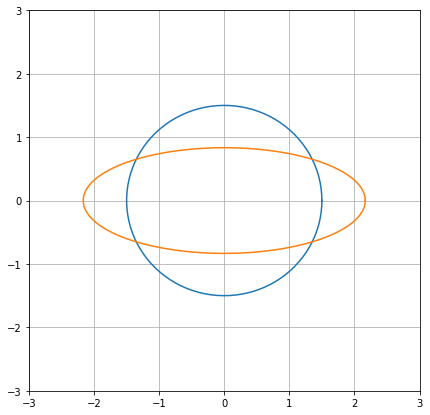

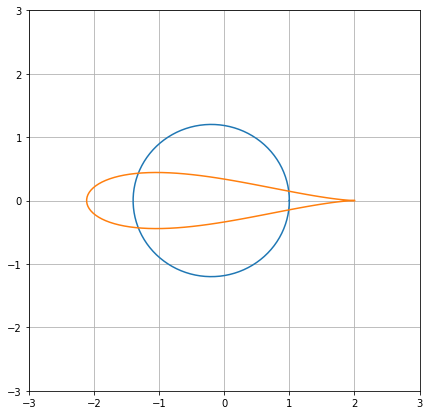

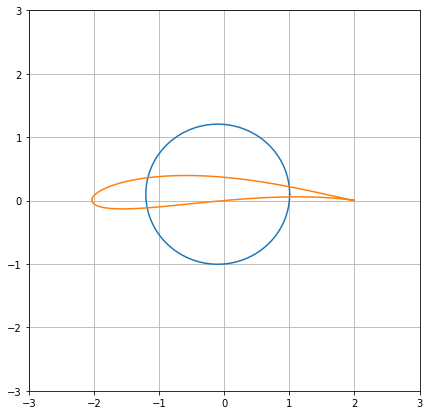

In [78]:
# Case 1: 
z = get_circle(0,0,1.5)
pyplot.figure(figsize=[7,7])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(z.real,z.imag)


J=get_airfoil(z,1)
pyplot.plot(J.real,J.imag)

# Case 2: 
xc2 = 1-1.2
z = get_circle(xc2,0,1.2)

pyplot.figure(figsize=[7,7])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(z.real,z.imag)


J=get_airfoil(z,1)
pyplot.plot(J.real,J.imag)

#Case 3: 
c = 1
xc = -0.1
yc =0.1
R = np.sqrt((c-xc)**2+(yc)**2)

z = get_circle(xc,yc,R)
pyplot.figure(figsize=[7,7])
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.grid(True)
pyplot.plot(z.real,z.imag)

J=get_airfoil(z,1)
pyplot.plot(J.real,J.imag)

#Question 4: For Case 2,a symmetric airfoil. which point correspond to the trailing edge of the airfoil in polar coord. 
pyplot.show()

## 3. Grid points on the z-plane using polar coordinates

In [73]:
N_r = 100
N_theta = 145


radius_p = 1.15
xc, yc = -0.15, 0.0


r_p = np.linspace(radius_p, 5, N_r)
theta_p = np.linspace(0, 2* np.pi, N_theta)
R_p, Theta_p = np.meshgrid(r_p, theta_p) 


x_p = xc + R_p * np.cos(Theta_p)
y_p = yc + R_p * np.sin(Theta_p)

X, Y = np.meshgrid(x_p, y_p)


In [74]:
z_p = (x_p + y_p*1j) 

J_p = get_airfoil(z_p, 1) 

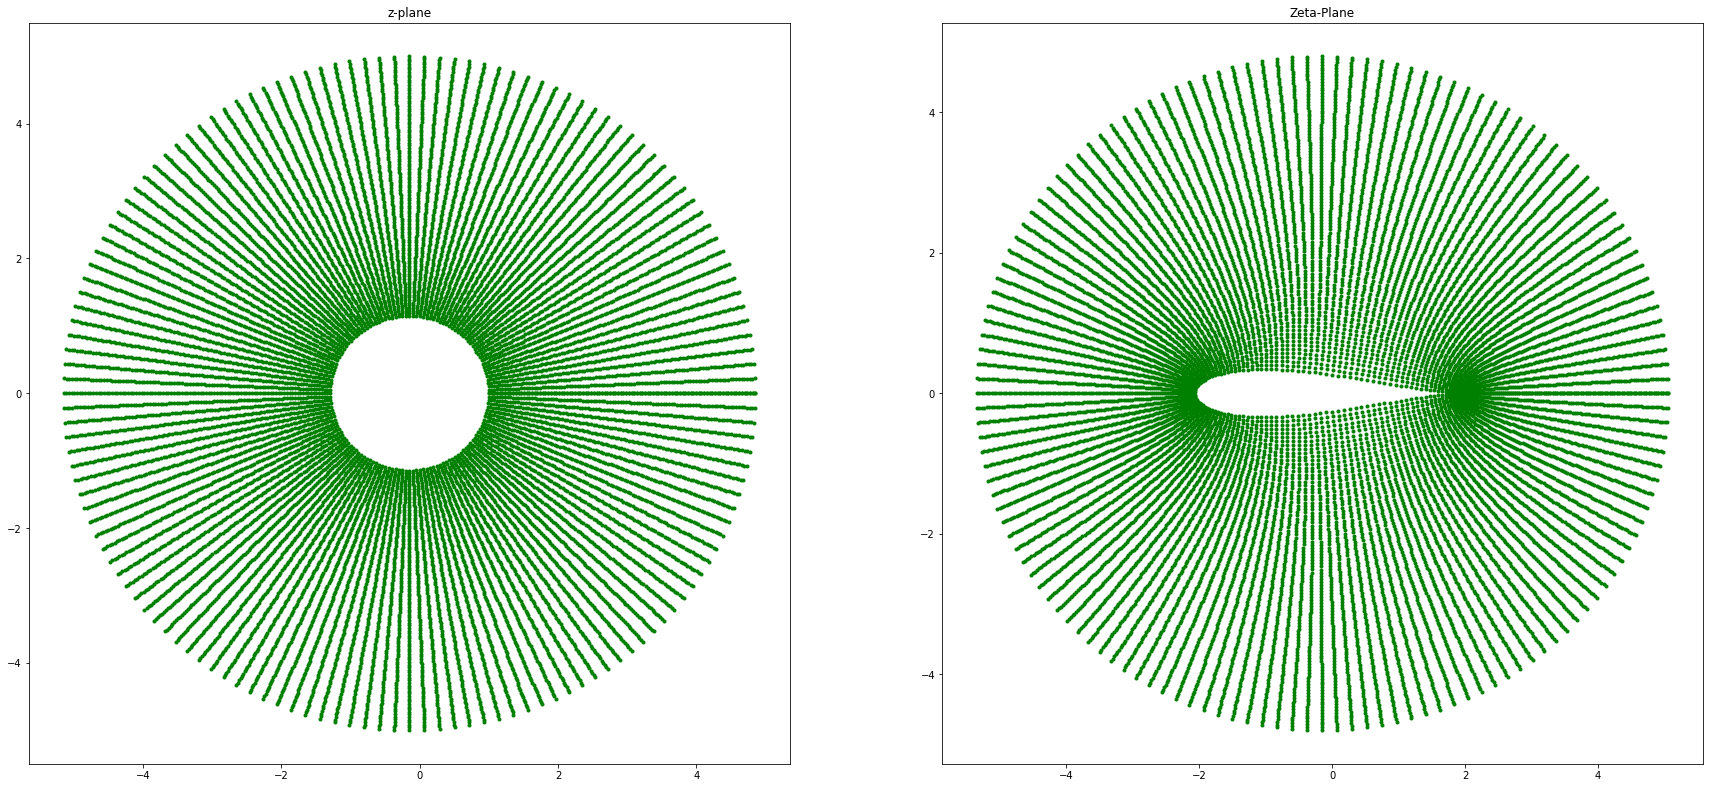

In [75]:
width = 30
height = 30
pyplot.figure(figsize = (width, height))
pyplot.subplot(2,2,1)
pyplot.plot(z_p.real, z_p.imag, 'g.') #Why scatter is not working ?
pyplot.title('z-plane') # how to increase the font size ?

pyplot.subplot(2,2,2)
pyplot.plot(J_p.real, J_p.imag, 'g.')
pyplot.title('Zeta-Plane')
pyplot.show()
#how to center at location?

## 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

In [26]:
##code
#you don't need a loop because the cylinder comes from the doublet and the free stream combination.
#What values of z and J are we using ?
#Redefine your z and J values same way we did in Q2
#include the xc yc = c-R, 0

In [100]:
N = 100

theta = np.linspace(0, 2*np.pi, N)
xc, yc = (0.15,0)
R = 1.15
x = xc + R*np.cos(theta)
y = yc + R*np.sin(theta)
    
X, Y = np.meshgrid(x, y)

z = get_circle((1-1.15), 0, 1.15)
J = get_airfoil(z, 1)

#Here size of z and J is 14500!
#how to define X and Y such that we have the same size

u_inf = 1.0

k = (Radius**2)*2*np.pi*u_inf     #k is the strength.  

In [80]:
def get_veolcity_Doublet ( strength, xd, yd, X, Y ): # parameters for function 
    u = -(strength) / (2*math.pi)*((X-xd)**2-(Y-yd)**2)/(((X-xd)**2+(Y-yd)**2)**2)
    v = -(strength) / (2*math.pi)*((2*(X-xd)*(Y-yd))/(((X-xd)**2+(Y-yd)**2))**2)
    return u, v

In [81]:
def get_streamlines_function_potential (strength, xd, yd, X, Y): 
    psi = -(strength) / (2*math.pi)*(Y-yd)/(((X-xd)**2+(Y-yd)**2)) #Streamlines 
    phi = (strength) / (2*math.pi)*(X-xd)/(((X-xd)**2+(Y-yd)**2)) #Veolcity Potetnial 
    return psi, phi

In [105]:
u_doublet = get_veolcity_Doublet(k, J.real, J.imag, X, Y)
v_doublet = get_veolcity_Doublet(k, J.real, J.imag, X, Y)


psi_doublet = get_streamlines_function_potential(k, z.real, z.imag, X, Y)
phi_doublet = get_streamlines_function_potential(k, z.real, z.imag, X, Y)

#u_doublet is it two arrays of real and imaginary 

(array([[-2.69897959, -2.72232439, -2.79390166, ..., -2.79390166,
         -2.72232439, -2.69897959],
        [-2.61263878, -2.63461682, -2.70244192, ..., -2.70043641,
         -2.63437737, -2.61263878],
        [-2.37256191, -2.3906477 , -2.44675866, ..., -2.44316966,
         -2.39021801, -2.37256191],
        ...,
        [-2.37256191, -2.39021801, -2.44316966, ..., -2.44675866,
         -2.3906477 , -2.37256191],
        [-2.61263878, -2.63437737, -2.70043641, ..., -2.70244192,
         -2.63461682, -2.61263878],
        [-2.69897959, -2.72232439, -2.79390166, ..., -2.79390166,
         -2.72232439, -2.69897959]]),
 array([[ 0.00000000e+00, -3.95479522e-04, -3.27270117e-03, ...,
          3.27270117e-03,  3.95479522e-04,  0.00000000e+00],
        [ 5.50431294e-01,  5.57114361e-01,  5.76226739e-01, ...,
          5.82342915e-01,  5.57854745e-01,  5.50431294e-01],
        [ 1.03147335e+00,  1.04383343e+00,  1.08071799e+00, ...,
          1.08568649e+00,  1.04443821e+00,  1.03147335e+

In [102]:
# How to visualize this problem and understand how to align the number of matrices?


u_freestream = u_inf * np.ones((N, N), dtype = float)
v_freestream = np.zeros((N, N), dtype = float)

# Calculate the streamfunction and veolcity potential for the freestream 

psi_freestream = u_inf * theta
phi_freestream = u_inf * R

In [103]:
u = u_freestream + u_doublet 
v = v_freestream + v_doublet    

psi = psi_freestream + psi_doublet
#phi = phi_freestream + phi_doublet

ValueError: 'u' and 'v' must be of shape 'Grid(x,y)'

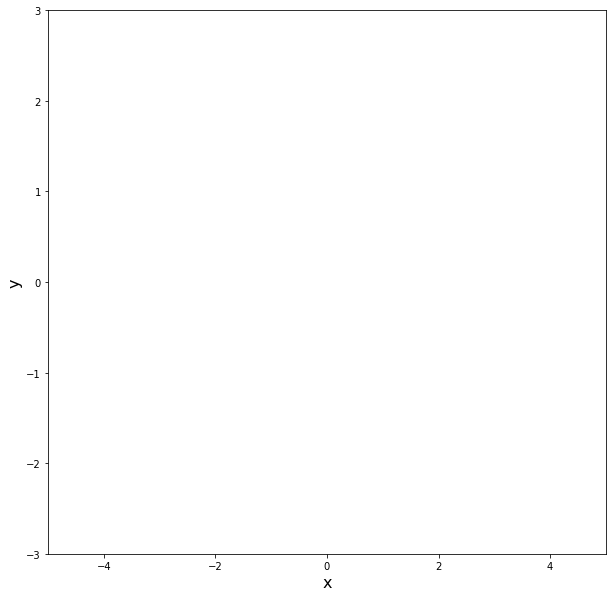

In [104]:
#Streamlines


width = 10
height = 10

pyplot.figure(figsize = (width, height))
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(-5, 5)
pyplot.ylim(-3, 3)

pyplot.streamplot(X, Y, u, v , density = 2, linewidth = 1, arrowsize = 1, arrowstyle='->')
#pyplot.scatter(x_doublet, y_doublet, color = 'r', s = 80, marker ='o')

In [76]:
#Veolcity Potential


In [77]:
#Pressure Coefficient 


## 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

In [ ]:
##Code
#To do this: 
    #We need rotate the complex plane z(x vs y) to get a new 
    #complex plane where the x' axis is parralell to the freestream veolcity
    
#AoA = alpha


## 6. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

In [ ]:
##Code
